In [24]:
print('Hello World')

Hello World


In [25]:
!ls /content/drive/MyDrive/FRE-6123\ Group\ Project/

 CRSP_Stock_Price.csv		      q5_factors_daily_2023.csv
 F-F_Momentum_Factor_daily.CSV	     'Quality Minus Junk Factors Daily.xlsx'
 F-F_ST_Reversal_Factor_daily.csv     standardized_portfolio_returns_by_frequency.csv
 North_America_5_Factors_Daily.csv    X_daily.csv
 portfolio_returns_by_frequency.csv


In [29]:
!ls "/content/drive/MyDrive/FRE-6123 Group Project/CRSP_Stock_Price.csv"

'/content/drive/MyDrive/FRE-6123 Group Project/CRSP_Stock_Price.csv'


In [32]:
file_path = "/content/drive/MyDrive/FRE-6123 Group Project/CRSP_Stock_Price.csv"
df = pd.read_csv(file_path)

Mounted at /content/drive


<ipython-input-31-d1f31504e25f>:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['DlyPrc'] = df['DlyPrc'].fillna(method='ffill')
<ipython-input-33-25aecc496495>:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['DlyPrc'] = df['DlyPrc'].fillna(method='ffill')
<ipython-input-33-25aecc496495>:23: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  portfolio_returns = df.resample(freq, on='DlyCalDt')['DlyRet'].mean()
<ipython-input-33-25aecc496495>:23: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  portfolio_returns = df.resample(freq, on='DlyCalDt')['DlyRet'].mean()


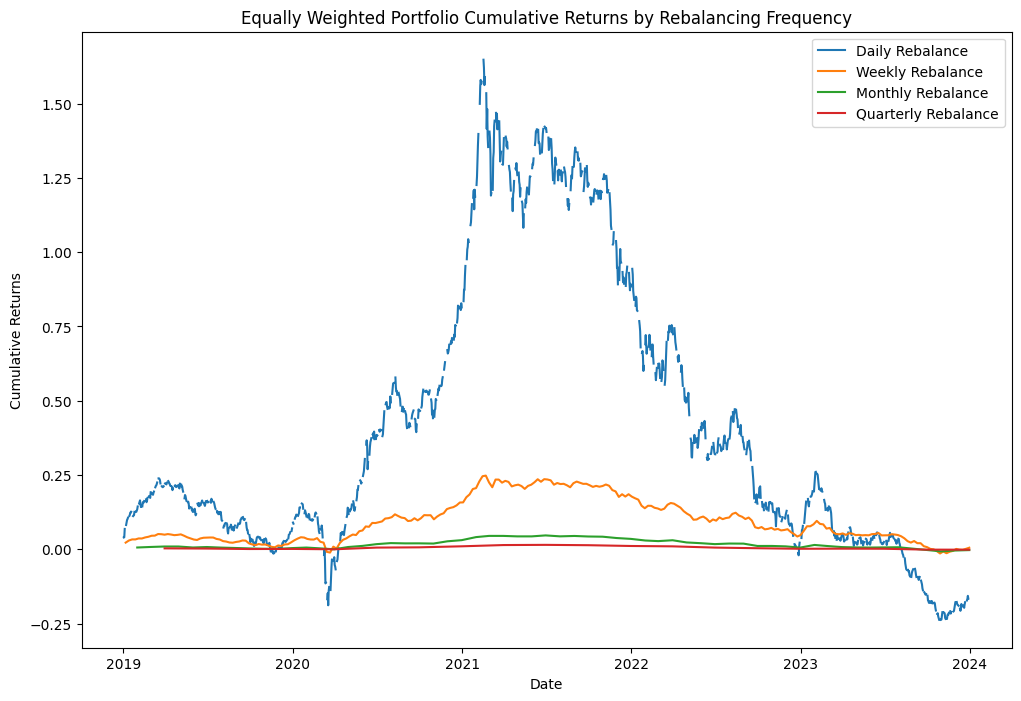

Cumulative rate of return for the total length of time with different rebalancing frequencies:
Daily Rebalance: -16.59%
Weekly Rebalance: 0.54%
Monthly Rebalance: -0.26%
Quarterly Rebalance: -0.13%


In [33]:
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
# 然后使用完整路径访问文件
file_path = "/content/drive/MyDrive/FRE-6123 Group Project/CRSP_Stock_Price.csv"
df = load_and_preprocess_data(file_path)

def load_and_preprocess_data(file_path):
    """加载数据并进行预处理"""
    #df = pd.read_csv(file_path)
    # 转换日期格式
    df['DlyCalDt'] = pd.to_datetime(df['DlyCalDt'])
    # 填充缺失值
    df['DlyPrc'] = df['DlyPrc'].fillna(method='ffill')
    df['DlyRet'] = df['DlyRet'].fillna(0)
    df['DlyVol'] = df['DlyVol'].fillna(0)
    return df

def calculate_portfolio_return(df, freq):
    """计算等权组合在不同再平衡频率下的收益率"""
    portfolio_returns = df.resample(freq, on='DlyCalDt')['DlyRet'].mean()
    cumulative_returns = (1 + portfolio_returns).cumprod() - 1
    return cumulative_returns

def plot_cumulative_returns(daily, weekly, monthly, quarterly):
    """绘制不同再平衡频率下的累计收益率走势图"""
    plt.figure(figsize=(12, 8))
    plt.plot(daily, label='Daily Rebalance')
    plt.plot(weekly, label='Weekly Rebalance')
    plt.plot(monthly, label='Monthly Rebalance')
    plt.plot(quarterly, label='Quarterly Rebalance')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.title('Equally Weighted Portfolio Cumulative Returns by Rebalancing Frequency')
    plt.legend()
    plt.show()

def calculate_final_cumulative_returns(daily, weekly, monthly, quarterly):
    """计算不同再平衡频率下的总时间长度的累计收益率"""
    final_returns = {
        'Daily Rebalance': daily.iloc[-1],
        'Weekly Rebalance': weekly.iloc[-1],
        'Monthly Rebalance': monthly.iloc[-1],
        'Quarterly Rebalance': quarterly.iloc[-1]
    }
    return final_returns

# 主程序
# 1. 加载和预处理数据
df = load_and_preprocess_data("CRSP_Stock_Price.csv")

# 2. 计算不同频率的累计收益率
daily_returns = calculate_portfolio_return(df, 'D')
weekly_returns = calculate_portfolio_return(df, 'W')
monthly_returns = calculate_portfolio_return(df, 'M')
quarterly_returns = calculate_portfolio_return(df, 'Q')

# 3. 绘制累计收益率的走势图
plot_cumulative_returns(daily_returns, weekly_returns, monthly_returns, quarterly_returns)

# 4. 计算不同再平衡频率的总时间长度的累计收益率
final_cumulative_returns = calculate_final_cumulative_returns(daily_returns, weekly_returns, monthly_returns, quarterly_returns)

# 输出最终结果
print("Cumulative rate of return for the total length of time with different rebalancing frequencies:")
for freq, return_val in final_cumulative_returns.items():
    print(f"{freq}: {return_val:.2%}")


In [ ]:
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load daily data from Google Drive
X_daily_df = pd.read_csv("/content/drive/MyDrive/FRE-6123 Group Project/X_daily.csv")

# Convert date columns to datetime format
X_daily_df['Date'] = pd.to_datetime(X_daily_df['Date'], format='%Y%m%d')  # Adjust the format based on your actual data

# 将 'Date' 列设置为索引
X_daily_df = X_daily_df.set_index('Date')

# Convert string columns to numeric after removing commas and percentage signs
for column in X_daily_df.columns:
    if X_daily_df[column].dtype == 'object':  # 如果是字符串类型
        X_daily_df[column] = X_daily_df[column].str.replace(',', '').str.replace('%', '').astype(float) / 100

# 进行重新采样操作
X_weekly = X_daily_df.resample('W').mean()
X_monthly = X_daily_df.resample('M').mean()
X_quarterly = X_daily_df.resample('Q').mean()

# 标准化数据
scaler = StandardScaler()

# 对每日、每周、每月和每季度的数据分别进行标准化
X_daily_df = pd.DataFrame(scaler.fit_transform(X_daily_df), index=X_daily_df.index, columns=X_daily_df.columns)
X_weekly = pd.DataFrame(scaler.fit_transform(X_weekly), index=X_weekly.index, columns=X_weekly.columns)
X_monthly = pd.DataFrame(scaler.fit_transform(X_monthly), index=X_monthly.index, columns=X_monthly.columns)
X_quarterly = pd.DataFrame(scaler.fit_transform(X_quarterly), index=X_quarterly.index, columns=X_quarterly.columns)

# 显示转换后的数据
print("Standardized Daily Frequency Data:")
print(X_daily_df.head())

print("\nStandardized Weekly Frequency Data:")
print(X_weekly.head())

print("\nStandardized Monthly Frequency Data:")
print(X_monthly.head())

print("\nStandardized Quarterly Frequency Data:")
print(X_quarterly.head())


Mounted at /content/drive
Standardized Daily Frequency Data:
                 WML       STR       MKT       SMB    HML_FF  HML_DEVIL  \
Date                                                                      
2019-01-02 -1.682459  1.526961  1.342651  0.980684  0.120872   0.610928   
2019-01-03 -0.561066  0.233717  1.342651  0.980684  0.120872   0.610928   
2019-01-04 -0.701240  1.266735  1.342651  0.980684  0.120872   0.610928   
2019-01-07 -0.568443  0.430858  1.342651  0.980684  0.120872   0.610928   
2019-01-08  0.095539  0.170632  1.342651  0.980684  0.120872   0.610928   

                UMD        ME      RFR       R_F     R_MKT      R_ME  \
Date                                                                   
2019-01-02 -1.61063 -1.805772  0.28378  0.277561  0.122579  0.986695   
2019-01-03 -1.61063 -1.805772  0.28378  0.277561 -1.822076 -0.011729   
2019-01-04 -1.61063 -1.805772  0.28378  0.277561  2.534653  0.569846   
2019-01-07 -1.61063 -1.805772  0.28378  0.277561  0.6

<ipython-input-8-d859b5d5a217>:24: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  X_monthly = X_daily_df.resample('M').mean()
<ipython-input-8-d859b5d5a217>:25: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  X_quarterly = X_daily_df.resample('Q').mean()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.preprocessing import StandardScaler

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Check if file exists in specified path
def check_file_exists(file_path):
    if os.path.exists(file_path):
        print("File found:", file_path)
    else:
        raise FileNotFoundError(f"File not found: {file_path}. Please verify the path.")

# Load and preprocess data function
def load_and_preprocess_data(file_path):
    """Load data and preprocess it by filling missing values and formatting date."""
    # Check if file exists
    check_file_exists(file_path)

    # Try loading data with error handling for any format issues
    try:
        df = pd.read_csv(file_path)
    except pd.errors.ParserError:
        print("Error loading CSV file. Please ensure it is comma-separated.")

    # Convert date column to datetime
    df['DlyCalDt'] = pd.to_datetime(df['DlyCalDt'], errors='coerce')
    # Fill missing values for relevant columns
    df['DlyPrc'] = df['DlyPrc'].fillna(method='ffill')
    df['DlyRet'] = df['DlyRet'].fillna(0)
    df['DlyVol'] = df['DlyVol'].fillna(0)
    return df

# Calculate portfolio returns at different frequencies
def calculate_portfolio_return(df, freq):
    """Calculate returns for equal-weighted portfolio with different rebalance frequencies."""
    portfolio_returns = df.resample(freq, on='DlyCalDt')['DlyRet'].mean()
    cumulative_returns = (1 + portfolio_returns).cumprod() - 1
    return portfolio_returns, cumulative_returns

# Plot cumulative returns for different rebalance frequencies
def plot_cumulative_returns(daily, weekly, monthly, quarterly):
    """Plot cumulative returns for different rebalance frequencies."""
    plt.figure(figsize=(12, 8))
    plt.plot(daily, label='Daily Rebalance')
    plt.plot(weekly, label='Weekly Rebalance')
    plt.plot(monthly, label='Monthly Rebalance')
    plt.plot(quarterly, label='Quarterly Rebalance')
    plt.xlabel('Date')
    plt.ylabel('Standardized Cumulative Returns')
    plt.title('Equally Weighted Portfolio Cumulative Returns by Rebalancing Frequency (Standardized)')
    plt.legend()
    plt.show()

# Calculate final cumulative returns for each frequency
def calculate_final_cumulative_returns(daily_cum, weekly_cum, monthly_cum, quarterly_cum):
    """Calculate final cumulative returns for each rebalance frequency."""
    final_returns = {
        'Daily Rebalance': daily_cum.iloc[-1],
        'Weekly Rebalance': weekly_cum.iloc[-1],
        'Monthly Rebalance': monthly_cum.iloc[-1],
        'Quarterly Rebalance': quarterly_cum.iloc[-1]
    }
    return final_returns

# Main program
# Define the correct file path
file_path = "/content/drive/My Drive/FRE-6123 Group Project/CRSP_Stock_Price.csv"

# 1. Load and preprocess data
df = load_and_preprocess_data(file_path)

# 2. Calculate non-cumulative and cumulative returns at different frequencies
daily_returns, daily_cum_returns = calculate_portfolio_return(df, 'D')
weekly_returns, weekly_cum_returns = calculate_portfolio_return(df, 'W')
monthly_returns, monthly_cum_returns = calculate_portfolio_return(df, 'M')
quarterly_returns, quarterly_cum_returns = calculate_portfolio_return(df, 'Q')

# 3. Standardize the returns
scaler = StandardScaler()

# Standardize non-cumulative returns
daily_returns = pd.Series(scaler.fit_transform(daily_returns.values.reshape(-1, 1)).flatten(), index=daily_returns.index)
weekly_returns = pd.Series(scaler.fit_transform(weekly_returns.values.reshape(-1, 1)).flatten(), index=weekly_returns.index)
monthly_returns = pd.Series(scaler.fit_transform(monthly_returns.values.reshape(-1, 1)).flatten(), index=monthly_returns.index)
quarterly_returns = pd.Series(scaler.fit_transform(quarterly_returns.values.reshape(-1, 1)).flatten(), index=quarterly_returns.index)

# Standardize cumulative returns
daily_cum_returns = pd.Series(scaler.fit_transform(daily_cum_returns.values.reshape(-1, 1)).flatten(), index=daily_cum_returns.index)
weekly_cum_returns = pd.Series(scaler.fit_transform(weekly_cum_returns.values.reshape(-1, 1)).flatten(), index=weekly_cum_returns.index)
monthly_cum_returns = pd.Series(scaler.fit_transform(monthly_cum_returns.values.reshape(-1, 1)).flatten(), index=monthly_cum_returns.index)
quarterly_cum_returns = pd.Series(scaler.fit_transform(quarterly_cum_returns.values.reshape(-1, 1)).flatten(), index=quarterly_cum_returns.index)

# 4. Save standardized non-cumulative returns to CSV
returns_df = pd.DataFrame({
    'Daily Return': daily_returns,
    'Weekly Return': weekly_returns,
    'Monthly Return': monthly_returns,
    'Quarterly Return': quarterly_returns
})

returns_df.to_csv("/content/drive/My Drive/FRE-6123 Group Project/standardized_portfolio_returns_by_frequency.csv", index=True)
print("Standardized non-cumulative returns saved to 'standardized_portfolio_returns_by_frequency.csv'.")

# 6. Calculate and display final cumulative returns for each frequency
final_cumulative_returns = calculate_final_cumulative_returns(daily_cum_returns, weekly_cum_returns, monthly_cum_returns, quarterly_cum_returns)

# Display standardized non-cumulative and cumulative returns for checking
print(daily_returns.head())
print(daily_cum_returns.head())
print(weekly_returns.head())
print(weekly_cum_returns.head())
print(monthly_returns.head())
print(monthly_cum_returns.head())
print(quarterly_returns.head())
print(quarterly_cum_returns.head())


Mounted at /content/drive
File found: /content/drive/My Drive/FRE-6123 Group Project/CRSP_Stock_Price.csv


<ipython-input-9-7fdc0b00bd26>:32: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['DlyPrc'] = df['DlyPrc'].fillna(method='ffill')
<ipython-input-9-7fdc0b00bd26>:40: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  portfolio_returns = df.resample(freq, on='DlyCalDt')['DlyRet'].mean()
<ipython-input-9-7fdc0b00bd26>:40: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  portfolio_returns = df.resample(freq, on='DlyCalDt')['DlyRet'].mean()


Standardized non-cumulative returns saved to 'standardized_portfolio_returns_by_frequency.csv'.
DlyCalDt
2019-01-02    3.070593
2019-01-03    0.042574
2019-01-04    2.090527
2019-01-05         NaN
2019-01-06         NaN
Freq: D, dtype: float64
DlyCalDt
2019-01-02   -0.789117
2019-01-03   -0.788028
2019-01-04   -0.728257
2019-01-05         NaN
2019-01-06         NaN
Freq: D, dtype: float64
DlyCalDt
2019-01-06    3.157954
2019-01-13    0.973081
2019-01-20    0.498539
2019-01-27   -0.014761
2019-02-03    0.447113
Freq: W-SUN, dtype: float64
DlyCalDt
2019-01-06   -0.974872
2019-01-13   -0.877004
2019-01-20   -0.826198
2019-01-27   -0.827038
2019-02-03   -0.781244
Freq: W-SUN, dtype: float64
DlyCalDt
2019-01-31    1.660639
2019-02-28    0.487207
2019-03-31    0.439811
2019-04-30    0.007811
2019-05-31   -0.881891
Freq: ME, dtype: float64
DlyCalDt
2019-01-31   -0.728947
2019-02-28   -0.613289
2019-03-31   -0.508939
2019-04-30   -0.509501
2019-05-31   -0.726469
Freq: ME, dtype: float64
DlyCal

In [ ]:
# 检查 y 的索引类型
print("Index type of y:", daily_returns.index)  # y 是 DlyRet 的变量名
print("Index is DatetimeIndex:", isinstance(daily_returns.index, pd.DatetimeIndex))
print("y head:", daily_returns.head())

print("Index type of x:", X_daily_df.index)  # y 是 DlyRet 的变量名
print("Index is DatetimeIndex:", isinstance(X_daily_df.index, pd.DatetimeIndex))
print("x head:", X_daily_df.head())

Index type of y: DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11',
               ...
               '2023-12-20', '2023-12-21', '2023-12-22', '2023-12-23',
               '2023-12-24', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='DlyCalDt', length=1823, freq='D')
Index is DatetimeIndex: True
y head: DlyCalDt
2019-01-02    3.070593
2019-01-03    0.042574
2019-01-04    2.090527
2019-01-05         NaN
2019-01-06         NaN
Freq: D, dtype: float64
Index type of x: DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-

In [ ]:
# 统计每个变量的缺失值个数
missing_values_count = {
    'daily_returns': daily_returns.isna().sum(),
    'daily_cum_returns': daily_cum_returns.isna().sum(),
    'weekly_returns': weekly_returns.isna().sum(),
    'weekly_cum_returns': weekly_cum_returns.isna().sum(),
    'monthly_returns': monthly_returns.isna().sum(),
    'monthly_cum_returns': monthly_cum_returns.isna().sum(),
    'quarterly_returns': quarterly_returns.isna().sum(),
    'quarterly_cum_returns': quarterly_cum_returns.isna().sum()
}

missing_values_count

{'daily_returns': 565,
 'daily_cum_returns': 565,
 'weekly_returns': 0,
 'weekly_cum_returns': 0,
 'monthly_returns': 0,
 'monthly_cum_returns': 0,
 'quarterly_returns': 0,
 'quarterly_cum_returns': 0}

In [ ]:
# 删除含有缺失值的行，只保留完整数据
daily_returns = daily_returns.dropna()
daily_cum_returns = daily_cum_returns.dropna()
weekly_returns = weekly_returns.dropna()
weekly_cum_returns = weekly_cum_returns.dropna()
monthly_returns = monthly_returns.dropna()
monthly_cum_returns = monthly_cum_returns.dropna()
quarterly_returns = quarterly_returns.dropna()
quarterly_cum_returns = quarterly_cum_returns.dropna()

# 获取每个变量的 shape（行数和列数）、缺失值数量以及数据类型
data_shapes_missing_counts_and_dtypes = {
    'daily_returns': {
        'shape': daily_returns.shape,
        'missing_values': daily_returns.isna().sum(),
        'dtype': daily_returns.dtypes
    },
    'daily_cum_returns': {
        'shape': daily_cum_returns.shape,
        'missing_values': daily_cum_returns.isna().sum(),
        'dtype': daily_cum_returns.dtypes
    },
    'weekly_returns': {
        'shape': weekly_returns.shape,
        'missing_values': weekly_returns.isna().sum(),
        'dtype': weekly_returns.dtypes
    },
    'weekly_cum_returns': {
        'shape': weekly_cum_returns.shape,
        'missing_values': weekly_cum_returns.isna().sum(),
        'dtype': weekly_cum_returns.dtypes
    },
    'monthly_returns': {
        'shape': monthly_returns.shape,
        'missing_values': monthly_returns.isna().sum(),
        'dtype': monthly_returns.dtypes
    },
    'monthly_cum_returns': {
        'shape': monthly_cum_returns.shape,
        'missing_values': monthly_cum_returns.isna().sum(),
        'dtype': monthly_cum_returns.dtypes
    },
    'quarterly_returns': {
        'shape': quarterly_returns.shape,
        'missing_values': quarterly_returns.isna().sum(),
        'dtype': quarterly_returns.dtypes
    },
    'quarterly_cum_returns': {
        'shape': quarterly_cum_returns.shape,
        'missing_values': quarterly_cum_returns.isna().sum(),
        'dtype': quarterly_cum_returns.dtypes
    }
}

data_shapes_missing_counts_and_dtypes


{'daily_returns': {'shape': (1258,),
  'missing_values': 0,
  'dtype': dtype('float64')},
 'daily_cum_returns': {'shape': (1258,),
  'missing_values': 0,
  'dtype': dtype('float64')},
 'weekly_returns': {'shape': (261,),
  'missing_values': 0,
  'dtype': dtype('float64')},
 'weekly_cum_returns': {'shape': (261,),
  'missing_values': 0,
  'dtype': dtype('float64')},
 'monthly_returns': {'shape': (60,),
  'missing_values': 0,
  'dtype': dtype('float64')},
 'monthly_cum_returns': {'shape': (60,),
  'missing_values': 0,
  'dtype': dtype('float64')},
 'quarterly_returns': {'shape': (20,),
  'missing_values': 0,
  'dtype': dtype('float64')},
 'quarterly_cum_returns': {'shape': (20,),
  'missing_values': 0,
  'dtype': dtype('float64')}}

In [ ]:
# 获取每个数据框的 shape 和数据类型
data_shapes_and_dtypes = {
    'X_daily_df': {
        'shape': X_daily_df.shape,
        'dtypes': X_daily_df.dtypes
    },
    'X_weekly': {
        'shape': X_weekly.shape,
        'dtypes': X_weekly.dtypes
    },
    'X_monthly': {
        'shape': X_monthly.shape,
        'dtypes': X_monthly.dtypes
    },
    'X_quarterly': {
        'shape': X_quarterly.shape,
        'dtypes': X_quarterly.dtypes
    }
}

data_shapes_and_dtypes

{'X_daily_df': {'shape': (1258, 15),
  'dtypes': WML          float64
  STR          float64
  MKT          float64
  SMB          float64
  HML_FF       float64
  HML_DEVIL    float64
  UMD          float64
  ME           float64
  RFR          float64
  R_F          float64
  R_MKT        float64
  R_ME         float64
  R_IA         float64
  R_ROE        float64
  R_EG         float64
  dtype: object},
 'X_weekly': {'shape': (261, 15),
  'dtypes': WML          float64
  STR          float64
  MKT          float64
  SMB          float64
  HML_FF       float64
  HML_DEVIL    float64
  UMD          float64
  ME           float64
  RFR          float64
  R_F          float64
  R_MKT        float64
  R_ME         float64
  R_IA         float64
  R_ROE        float64
  R_EG         float64
  dtype: object},
 'X_monthly': {'shape': (60, 15),
  'dtypes': WML          float64
  STR          float64
  MKT          float64
  SMB          float64
  HML_FF       float64
  HML_DEVIL    float64
 

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 定义逐步回归函数
def stepwise_regression(X, y, frequency):
    # 存储每步的模型结果
    models = {}

    # 获取因子列列表
    factors = X.columns.tolist()

    for i in range(1, len(factors) + 1):
        # 逐步添加因子
        selected_factors = factors[:i]

        # 为当前选择的X添加常数项
        X_step = sm.add_constant(X[selected_factors])

        # 执行回归
        model = sm.OLS(y, X_step).fit()

        # 保存每步的结果
        models[f"Model_{i}"] = model

        # 输出每步回归结果
        print(f"{frequency} Frequency Stepwise Regression Results (Model with {', '.join(selected_factors)}):")
        print(model.summary())
        print("\n")

    return models

# # 假设 y_daily, y_weekly, y_monthly, y_quarterly 已经加载并与 X_daily, X_weekly, X_monthly, X_quarterly 对应
# # # 确保 X_daily_df 和 daily_returns 是数值类型
# X_daily_df = X_daily_df.apply(pd.to_numeric, errors='coerce')
# daily_returns = pd.to_numeric(daily_returns, errors='coerce')
# # 将 'Date' 设为索引，确保 X 和 y 的索引一致
# X_daily_df.set_index('Date', inplace=True)
# daily_returns.index = pd.to_datetime(daily_returns.index)



# 重新运行逐步回归
models_daily = stepwise_regression(X_daily_df, daily_returns, "Daily")


# 周频逐步回归
models_weekly = stepwise_regression(X_weekly, weekly_returns, "Weekly")

# 月频逐步回归
models_monthly = stepwise_regression(X_monthly, monthly_returns, "Monthly")

# 季频逐步回归
models_quarterly = stepwise_regression(X_quarterly, quarterly_returns, "Quarterly")


Daily Frequency Stepwise Regression Results (Model with WML):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     51.95
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           9.78e-13
Time:                        23:47:37   Log-Likelihood:                -1759.5
No. Observations:                1258   AIC:                             3523.
Df Residuals:                    1256   BIC:                             3533.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 定义逐步回归函数，返回结果表格
def stepwise_regression_table(X, y, frequency):
    # 存储每步的回归结果
    results_table = pd.DataFrame()
    factors = X.columns.tolist()

    for i in range(1, len(factors) + 1):
        # 逐步添加因子
        selected_factors = factors[:i]

        # 为当前选择的X添加常数项
        X_step = sm.add_constant(X[selected_factors])

        # 执行回归
        model = sm.OLS(y, X_step).fit()

        # 提取系数和t值
        coefs = model.params
        t_values = model.tvalues

        # 将结果添加到表格中
        for factor in selected_factors:
            results_table.loc[factor, f"Model_{i}_coef"] = coefs[factor]
            results_table.loc[factor, f"Model_{i}_tvalue"] = t_values[factor]

        # 添加截距项
        results_table.loc['Intercept', f"Model_{i}_coef"] = coefs['const']
        results_table.loc['Intercept', f"Model_{i}_tvalue"] = t_values['const']

        # 添加其他统计量
        results_table.loc['Adj. R²', f"Model_{i}_coef"] = model.rsquared_adj
        results_table.loc['Obs', f"Model_{i}_coef"] = int(model.nobs)

        # print(f"{frequency} Frequency Stepwise Regression Results (Model with {', '.join(selected_factors)}):")
        # print(model.summary())
        # print("\n")

    return results_table

# 假设 y_daily, y_weekly, y_monthly, y_quarterly 已经加载并与 X_daily, X_weekly, X_monthly, X_quarterly 对应

# 运行逐步回归并生成结果表格
results_table_daily = stepwise_regression_table(X_daily_df, daily_returns, "Daily")
results_table_weekly = stepwise_regression_table(X_weekly, weekly_returns, "Weekly")
results_table_monthly = stepwise_regression_table(X_monthly, monthly_returns, "Monthly")
results_table_quarterly = stepwise_regression_table(X_quarterly, quarterly_returns, "Quarterly")

# 显示结果表格
print("Daily Frequency Regression Table:")
print(results_table_daily)

print("Weekly Frequency Regression Table:")
print(results_table_weekly)

print("Monthly Frequency Regression Table:")
print(results_table_monthly)

print("Quarterly Frequency Regression Table:")
print(results_table_quarterly)


Daily Frequency Regression Table:
           Model_1_coef  Model_1_tvalue  Model_2_coef  Model_2_tvalue  \
WML       -1.993017e-01   -7.207872e+00 -1.693360e-01   -6.560962e+00   
Intercept -5.326143e-18   -1.926234e-16 -5.326143e-18   -2.070740e-16   
Adj. R²    3.895660e-02             NaN  1.684091e-01             NaN   
Obs        1.258000e+03             NaN  1.258000e+03             NaN   
STR                 NaN             NaN  3.618135e-01    1.401854e+01   
MKT                 NaN             NaN           NaN             NaN   
SMB                 NaN             NaN           NaN             NaN   
HML_FF              NaN             NaN           NaN             NaN   
HML_DEVIL           NaN             NaN           NaN             NaN   
UMD                 NaN             NaN           NaN             NaN   
ME                  NaN             NaN           NaN             NaN   
RFR                 NaN             NaN           NaN             NaN   
R_F              

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 定义逐步回归函数，返回格式化后的结果表格
def stepwise_regression_table(X, y, frequency):
    results_table = pd.DataFrame()
    factors = X.columns.tolist()

    for i in range(1, len(factors) + 1):
        selected_factors = factors[:i]
        X_step = sm.add_constant(X[selected_factors], has_constant='add')  # 确保添加常数项
        model = sm.OLS(y, X_step).fit()

        coefs = model.params
        t_values = model.tvalues

        # 填充系数和 t 值
        for factor in selected_factors:
            results_table.loc[factor, f"Model {i} Coef"] = f"{coefs.get(factor, float('nan')):.2f}"
            results_table.loc[factor, f"Model {i} t-Value"] = f"({t_values.get(factor, float('nan')):.2f})"

        # 填充截距项
        if 'const' in coefs:
            results_table.loc['Intercept', f"Model {i} Coef"] = f"{coefs['const']:.2f}"
            results_table.loc['Intercept', f"Model {i} t-Value"] = f"({t_values['const']:.2f})"

        # 填充 R² 和观察值
        results_table.loc['Adj. R²', f"Model {i} Coef"] = f"{model.rsquared_adj:.2f}"
        results_table.loc['Obs', f"Model {i} Coef"] = f"{int(model.nobs)}"

    return results_table

# 假设 y_daily, y_weekly, y_monthly, y_quarterly 已经加载并与 X_daily, X_weekly, X_monthly, X_quarterly 对应

# 运行逐步回归并生成格式化后的结果表格
results_table_daily = stepwise_regression_table(X_daily_df, daily_returns, "Daily")
results_table_weekly = stepwise_regression_table(X_weekly, weekly_returns, "Weekly")
results_table_monthly = stepwise_regression_table(X_monthly, monthly_returns, "Monthly")
results_table_quarterly = stepwise_regression_table(X_quarterly, quarterly_returns, "Quarterly")

# 显示整合后的结果表格
results_table_daily


,Model 1 Coef,Model 1 t-Value,Model 2 Coef,Model 2 t-Value,Model 3 Coef,Model 3 t-Value,Model 4 Coef,Model 4 t-Value,Model 5 Coef,Model 5 t-Value,...,Model 11 Coef,Model 11 t-Value,Model 12 Coef,Model 12 t-Value,Model 13 Coef,Model 13 t-Value,Model 14 Coef,Model 14 t-Value,Model 15 Coef,Model 15 t-Value
WML,-0.20,(-7.21),-0.17,(-6.56),-0.16,(-6.20),-0.15,(-5.99),-0.15,(-6.05),...,-0.04,(-2.23),0.01,(0.39),0.02,(1.04),0.16,(8.87),0.18,(9.30)
Intercept,-0.00,(-0.00),-0.00,(-0.00),-0.00,(-0.00),-0.00,(-0.00),-0.00,(-0.00),...,-0.00,(-0.00),-0.00,(-0.00),-0.00,(-0.00),-0.00,(-0.00),-0.00,(-0.00)
Adj. R²,0.04,NaN,0.17,NaN,0.19,NaN,0.20,NaN,0.20,NaN,...,0.52,NaN,0.60,NaN,0.62,NaN,0.69,NaN,0.70,NaN
Obs,1258,NaN,1258,NaN,1258,NaN,1258,NaN,1258,NaN,...,1258,NaN,1258,NaN,1258,NaN,1258,NaN,1258,NaN
STR,NaN,NaN,0.36,(14.02),0.36,(14.03),0.36,(14.01),0.36,(14.09),...,0.14,(6.82),0.09,(4.66),0.07,(3.53),0.05,(3.10),0.05,(2.60)
MKT,NaN,NaN,NaN,NaN,0.14,(5.45),0.08,(2.88),0.09,(3.27),...,0.03,(1.21),0.02,(0.97),0.03,(1.25),0.03,(1.48),0.03,(1.36)
SMB,NaN,NaN,NaN,NaN,NaN,NaN,0.13,(4.50),0.13,(4.56),...,0.11,(4.06),0.07,(2.91),0.05,(2.14),0.03,(1.61),0.03,(1.37)
HML_FF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.06,(-2.45),...,-0.02,(-0.37),-0.04,(-0.80),-0.01,(-0.22),-0.05,(-0.98),-0.05,(-1.07)
HML_DEVIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.05,(-0.64),-0.03,(-0.49),-0.05,(-0.68),-0.00,(-0.04),0.00,(0.03)
UMD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.03,(-0.70),-0.04,(-1.03),-0.05,(-1.31),-0.02,(-0.75),-0.03,(-0.82)


In [ ]:
import pandas as pd
import statsmodels.api as sm

# 定义逐步回归函数，返回格式化后的结果表格，将 t-value 放在 coefficient 下面
def stepwise_regression_table(X, y, frequency):
    results_table = pd.DataFrame()
    factors = X.columns.tolist()

    for i in range(1, len(factors) + 1):
        selected_factors = factors[:i]
        X_step = sm.add_constant(X[selected_factors], has_constant='add')  # 确保添加常数项
        model = sm.OLS(y, X_step).fit()

        coefs = model.params
        t_values = model.tvalues

        # 填充系数和 t 值，将 t-value 放在 coefficient 下面
        for factor in selected_factors:
            coef = f"{coefs.get(factor, ''):.2f}" if factor in coefs else ""
            t_val = f"({t_values.get(factor, ''):.2f})" if factor in t_values else ""
            results_table.loc[factor, f"Model {i}"] = coef + " " + t_val  # 将 t-value 紧跟在 coefficient 下方

        # 填充截距项
        if 'const' in coefs:
            intercept_coef = f"{coefs['const']:.2f}" if not pd.isna(coefs['const']) else ""
            intercept_tvalue = f"({t_values['const']:.2f})" if not pd.isna(t_values['const']) else ""
            results_table.loc['Intercept', f"Model {i}"] = intercept_coef + " " + intercept_tvalue

        # 填充 R² 和观察值
        results_table.loc['Adj. R²', f"Model {i}"] = f"{model.rsquared_adj:.2f}"
        results_table.loc['Obs', f"Model {i}"] = f"{int(model.nobs)}"

    # 将 Intercept、Adj. R²、Obs 移到表格的最后
    last_rows = results_table.loc[['Intercept', 'Adj. R²', 'Obs']]
    results_table = results_table.drop(['Intercept', 'Adj. R²', 'Obs'])
    results_table = pd.concat([results_table, last_rows])

    return results_table

# 对齐索引确保一致性
X_daily_df, daily_returns = X_daily_df.align(daily_returns, join='inner', axis=0)
X_weekly, weekly_returns = X_weekly.align(weekly_returns, join='inner', axis=0)
X_monthly, monthly_returns = X_monthly.align(monthly_returns, join='inner', axis=0)
X_quarterly, quarterly_returns = X_quarterly.align(quarterly_returns, join='inner', axis=0)

# 运行逐步回归并生成格式化后的结果表格
results_table_daily = stepwise_regression_table(X_daily_df, daily_returns, "Daily")
results_table_weekly = stepwise_regression_table(X_weekly, weekly_returns, "Weekly")
results_table_monthly = stepwise_regression_table(X_monthly, monthly_returns, "Monthly")
results_table_quarterly = stepwise_regression_table(X_quarterly, quarterly_returns, "Quarterly")

print("Daily Frequency Table:")
print(results_table_daily)

print("Weekly Frequency Table:")
print(results_table_weekly)

print("Monthly Frequency Table:")
print(results_table_monthly)

print("Quarterly Frequency Table:")
print(results_table_quarterly)

# # 将所有频率的结果保存到同一个 Excel 文件中的不同工作表
# with pd.ExcelWriter('C:\\Users\\mini\\Desktop\\Frequency_Regression_Tables.xlsx') as writer:
#     results_table_daily.to_excel(writer, sheet_name='Daily Frequency Regression')
#     results_table_weekly.to_excel(writer, sheet_name='Weekly Frequency Regression')
#     results_table_monthly.to_excel(writer, sheet_name='Monthly Frequency Regression')
#     results_table_quarterly.to_excel(writer, sheet_name='Quarterly Frequency Regression')

# "C:\\Users\\mini\\Desktop\\Frequency_Regression_Tables.xlsx"


Daily Frequency Table:
                 Model 1        Model 2        Model 3        Model 4  \
WML        -0.20 (-7.21)  -0.17 (-6.56)  -0.16 (-6.20)  -0.15 (-5.99)   
STR                  NaN   0.36 (14.02)   0.36 (14.03)   0.36 (14.01)   
MKT                  NaN            NaN    0.14 (5.45)    0.08 (2.88)   
SMB                  NaN            NaN            NaN    0.13 (4.50)   
HML_FF               NaN            NaN            NaN            NaN   
HML_DEVIL            NaN            NaN            NaN            NaN   
UMD                  NaN            NaN            NaN            NaN   
ME                   NaN            NaN            NaN            NaN   
RFR                  NaN            NaN            NaN            NaN   
R_F                  NaN            NaN            NaN            NaN   
R_MKT                NaN            NaN            NaN            NaN   
R_ME                 NaN            NaN            NaN            NaN   
R_IA                 NaN    

In [ ]:
results_table_daily.to_excel('C:\\Users\\mini\\Desktop\\Daily_Frequency_Regression.xlsx', sheet_name='Daily Frequency Regression')


In [ ]:
results_table_daily.to_excel('/content/Daily_Frequency_Regression.xlsx', sheet_name='Daily Frequency Regression')


In [ ]:
from google.colab import files
files.download('/content/Daily_Frequency_Regression.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# 将所有频率的结果保存到同一个 Excel 文件中的不同工作表
file_path = '/content/Frequency_Regression_Tables.xlsx'
with pd.ExcelWriter(file_path) as writer:
    results_table_daily.to_excel(writer, sheet_name='Daily Frequency Regression')
    results_table_weekly.to_excel(writer, sheet_name='Weekly Frequency Regression')
    results_table_monthly.to_excel(writer, sheet_name='Monthly Frequency Regression')
    results_table_quarterly.to_excel(writer, sheet_name='Quarterly Frequency Regression')

# 下载文件
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 定义逐步回归函数
def stepwise_regression(X, y, frequency):
    # 存储每步的模型结果
    models = {}

    # 获取因子列列表
    factors = X.columns.tolist()

    for i in range(1, len(factors) + 1):
        # 逐步添加因子
        selected_factors = factors[:i]

        # 为当前选择的X添加常数项
        X_step = sm.add_constant(X[selected_factors])

        # 执行回归
        model = sm.OLS(y, X_step).fit()

        # 保存每步的结果
        models[f"Model_{i}"] = model

        # 输出每步回归结果
        print(f"{frequency} Frequency Stepwise Regression Results (Model with {', '.join(selected_factors)}):")
        print(model.summary())
        print("\n")

    return models

# # 假设 y_daily, y_weekly, y_monthly, y_quarterly 已经加载并与 X_daily, X_weekly, X_monthly, X_quarterly 对应
# # # 确保 X_daily_df 和 daily_returns 是数值类型
# X_daily_df = X_daily_df.apply(pd.to_numeric, errors='coerce')
# daily_returns = pd.to_numeric(daily_returns, errors='coerce')
# # 将 'Date' 设为索引，确保 X 和 y 的索引一致
# X_daily_df.set_index('Date', inplace=True)
# daily_returns.index = pd.to_datetime(daily_returns.index)



# 重新运行逐步回归
models_daily = stepwise_regression(X_daily_df, daily_cum_returns, "Daily")


# 周频逐步回归
models_weekly = stepwise_regression(X_weekly, weekly_cum_returns, "Weekly")

# 月频逐步回归
models_monthly = stepwise_regression(X_monthly, monthly_cum_returns, "Monthly")

# 季频逐步回归
models_quarterly = stepwise_regression(X_quarterly, quarterly_cum_returns, "Quarterly")


Daily Frequency Stepwise Regression Results (Model with WML):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                   0.03113
Date:                Tue, 12 Nov 2024   Prob (F-statistic):              0.860
Time:                        20:33:16   Log-Likelihood:                -1785.0
No. Observations:                1258   AIC:                             3574.
Df Residuals:                    1256   BIC:                             3584.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [ ]:
import pandas as pd
import statsmodels.api as sm

# 定义逐步回归函数，返回格式化后的结果表格，将 t-value 放在 coefficient 下面
def stepwise_regression_table(X, y, frequency):
    results_table = pd.DataFrame()
    factors = X.columns.tolist()

    for i in range(1, len(factors) + 1):
        selected_factors = factors[:i]
        X_step = sm.add_constant(X[selected_factors], has_constant='add')  # 确保添加常数项
        model = sm.OLS(y, X_step).fit()

        coefs = model.params
        t_values = model.tvalues

        # 填充系数和 t 值，将 t-value 放在 coefficient 下面
        for factor in selected_factors:
            coef = f"{coefs.get(factor, ''):.2f}" if factor in coefs else ""
            t_val = f"({t_values.get(factor, ''):.2f})" if factor in t_values else ""
            results_table.loc[factor, f"Model {i}"] = coef + " " + t_val  # 将 t-value 紧跟在 coefficient 下方

        # 填充截距项
        if 'const' in coefs:
            intercept_coef = f"{coefs['const']:.2f}" if not pd.isna(coefs['const']) else ""
            intercept_tvalue = f"({t_values['const']:.2f})" if not pd.isna(t_values['const']) else ""
            results_table.loc['Intercept', f"Model {i}"] = intercept_coef + " " + intercept_tvalue

        # 填充 R² 和观察值
        results_table.loc['Adj. R²', f"Model {i}"] = f"{model.rsquared_adj:.2f}"
        results_table.loc['Obs', f"Model {i}"] = f"{int(model.nobs)}"

    # 将 Intercept、Adj. R²、Obs 移到表格的最后
    last_rows = results_table.loc[['Intercept', 'Adj. R²', 'Obs']]
    results_table = results_table.drop(['Intercept', 'Adj. R²', 'Obs'])
    results_table = pd.concat([results_table, last_rows])

    return results_table

# 对齐索引确保一致性
X_daily_df, daily_returns = X_daily_df.align(daily_cum_returns, join='inner', axis=0)
X_weekly, weekly_returns = X_weekly.align(weekly_cum_returns, join='inner', axis=0)
X_monthly, monthly_returns = X_monthly.align(monthly_cum_returns, join='inner', axis=0)
X_quarterly, quarterly_returns = X_quarterly.align(quarterly_cum_returns, join='inner', axis=0)

# 运行逐步回归并生成格式化后的结果表格
results_table_cumdaily = stepwise_regression_table(X_daily_df, daily_cum_returns, "Daily")
results_table_cumweekly = stepwise_regression_table(X_weekly, weekly_cum_returns, "Weekly")
results_table_cummonthly = stepwise_regression_table(X_monthly, monthly_cum_returns, "Monthly")
results_table_cumquarterly = stepwise_regression_table(X_quarterly, quarterly_cum_returns, "Quarterly")

print("Daily Frequency Table:")
print(results_table_cumdaily)

print("Weekly Frequency Table:")
print(results_table_cumweekly)

print("Monthly Frequency Table:")
print(results_table_cummonthly)

print("Quarterly Frequency Table:")
print(results_table_cumquarterly)

# # 将所有频率的结果保存到同一个 Excel 文件中的不同工作表
# with pd.ExcelWriter('C:\\Users\\mini\\Desktop\\Frequency_Regression_Tables.xlsx') as writer:
#     results_table_daily.to_excel(writer, sheet_name='Daily Frequency Regression')
#     results_table_weekly.to_excel(writer, sheet_name='Weekly Frequency Regression')
#     results_table_monthly.to_excel(writer, sheet_name='Monthly Frequency Regression')
#     results_table_quarterly.to_excel(writer, sheet_name='Quarterly Frequency Regression')

# "C:\\Users\\mini\\Desktop\\Frequency_Regression_Tables.xlsx"


Daily Frequency Table:
                 Model 1        Model 2        Model 3        Model 4  \
WML        -0.00 (-0.18)  -0.01 (-0.19)  -0.01 (-0.19)    0.00 (0.08)   
STR                  NaN  -0.01 (-0.19)  -0.01 (-0.19)  -0.01 (-0.33)   
MKT                  NaN            NaN    0.00 (0.06)  -0.07 (-2.08)   
SMB                  NaN            NaN            NaN    0.15 (4.73)   
HML_FF               NaN            NaN            NaN            NaN   
HML_DEVIL            NaN            NaN            NaN            NaN   
UMD                  NaN            NaN            NaN            NaN   
ME                   NaN            NaN            NaN            NaN   
RFR                  NaN            NaN            NaN            NaN   
R_F                  NaN            NaN            NaN            NaN   
R_MKT                NaN            NaN            NaN            NaN   
R_ME                 NaN            NaN            NaN            NaN   
R_IA                 NaN    

In [ ]:
# 将所有频率的结果保存到同一个 Excel 文件中的不同工作表
file_path = '/content/Frequency_cumRegression_Tables.xlsx'
with pd.ExcelWriter(file_path) as writer:
    results_table_cumdaily.to_excel(writer, sheet_name='Daily Frequency Regression')
    results_table_cumweekly.to_excel(writer, sheet_name='Weekly Frequency Regression')
    results_table_cummonthly.to_excel(writer, sheet_name='Monthly Frequency Regression')
    results_table_cumquarterly.to_excel(writer, sheet_name='Quarterly Frequency Regression')

# 下载文件
files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mounted at /content/drive


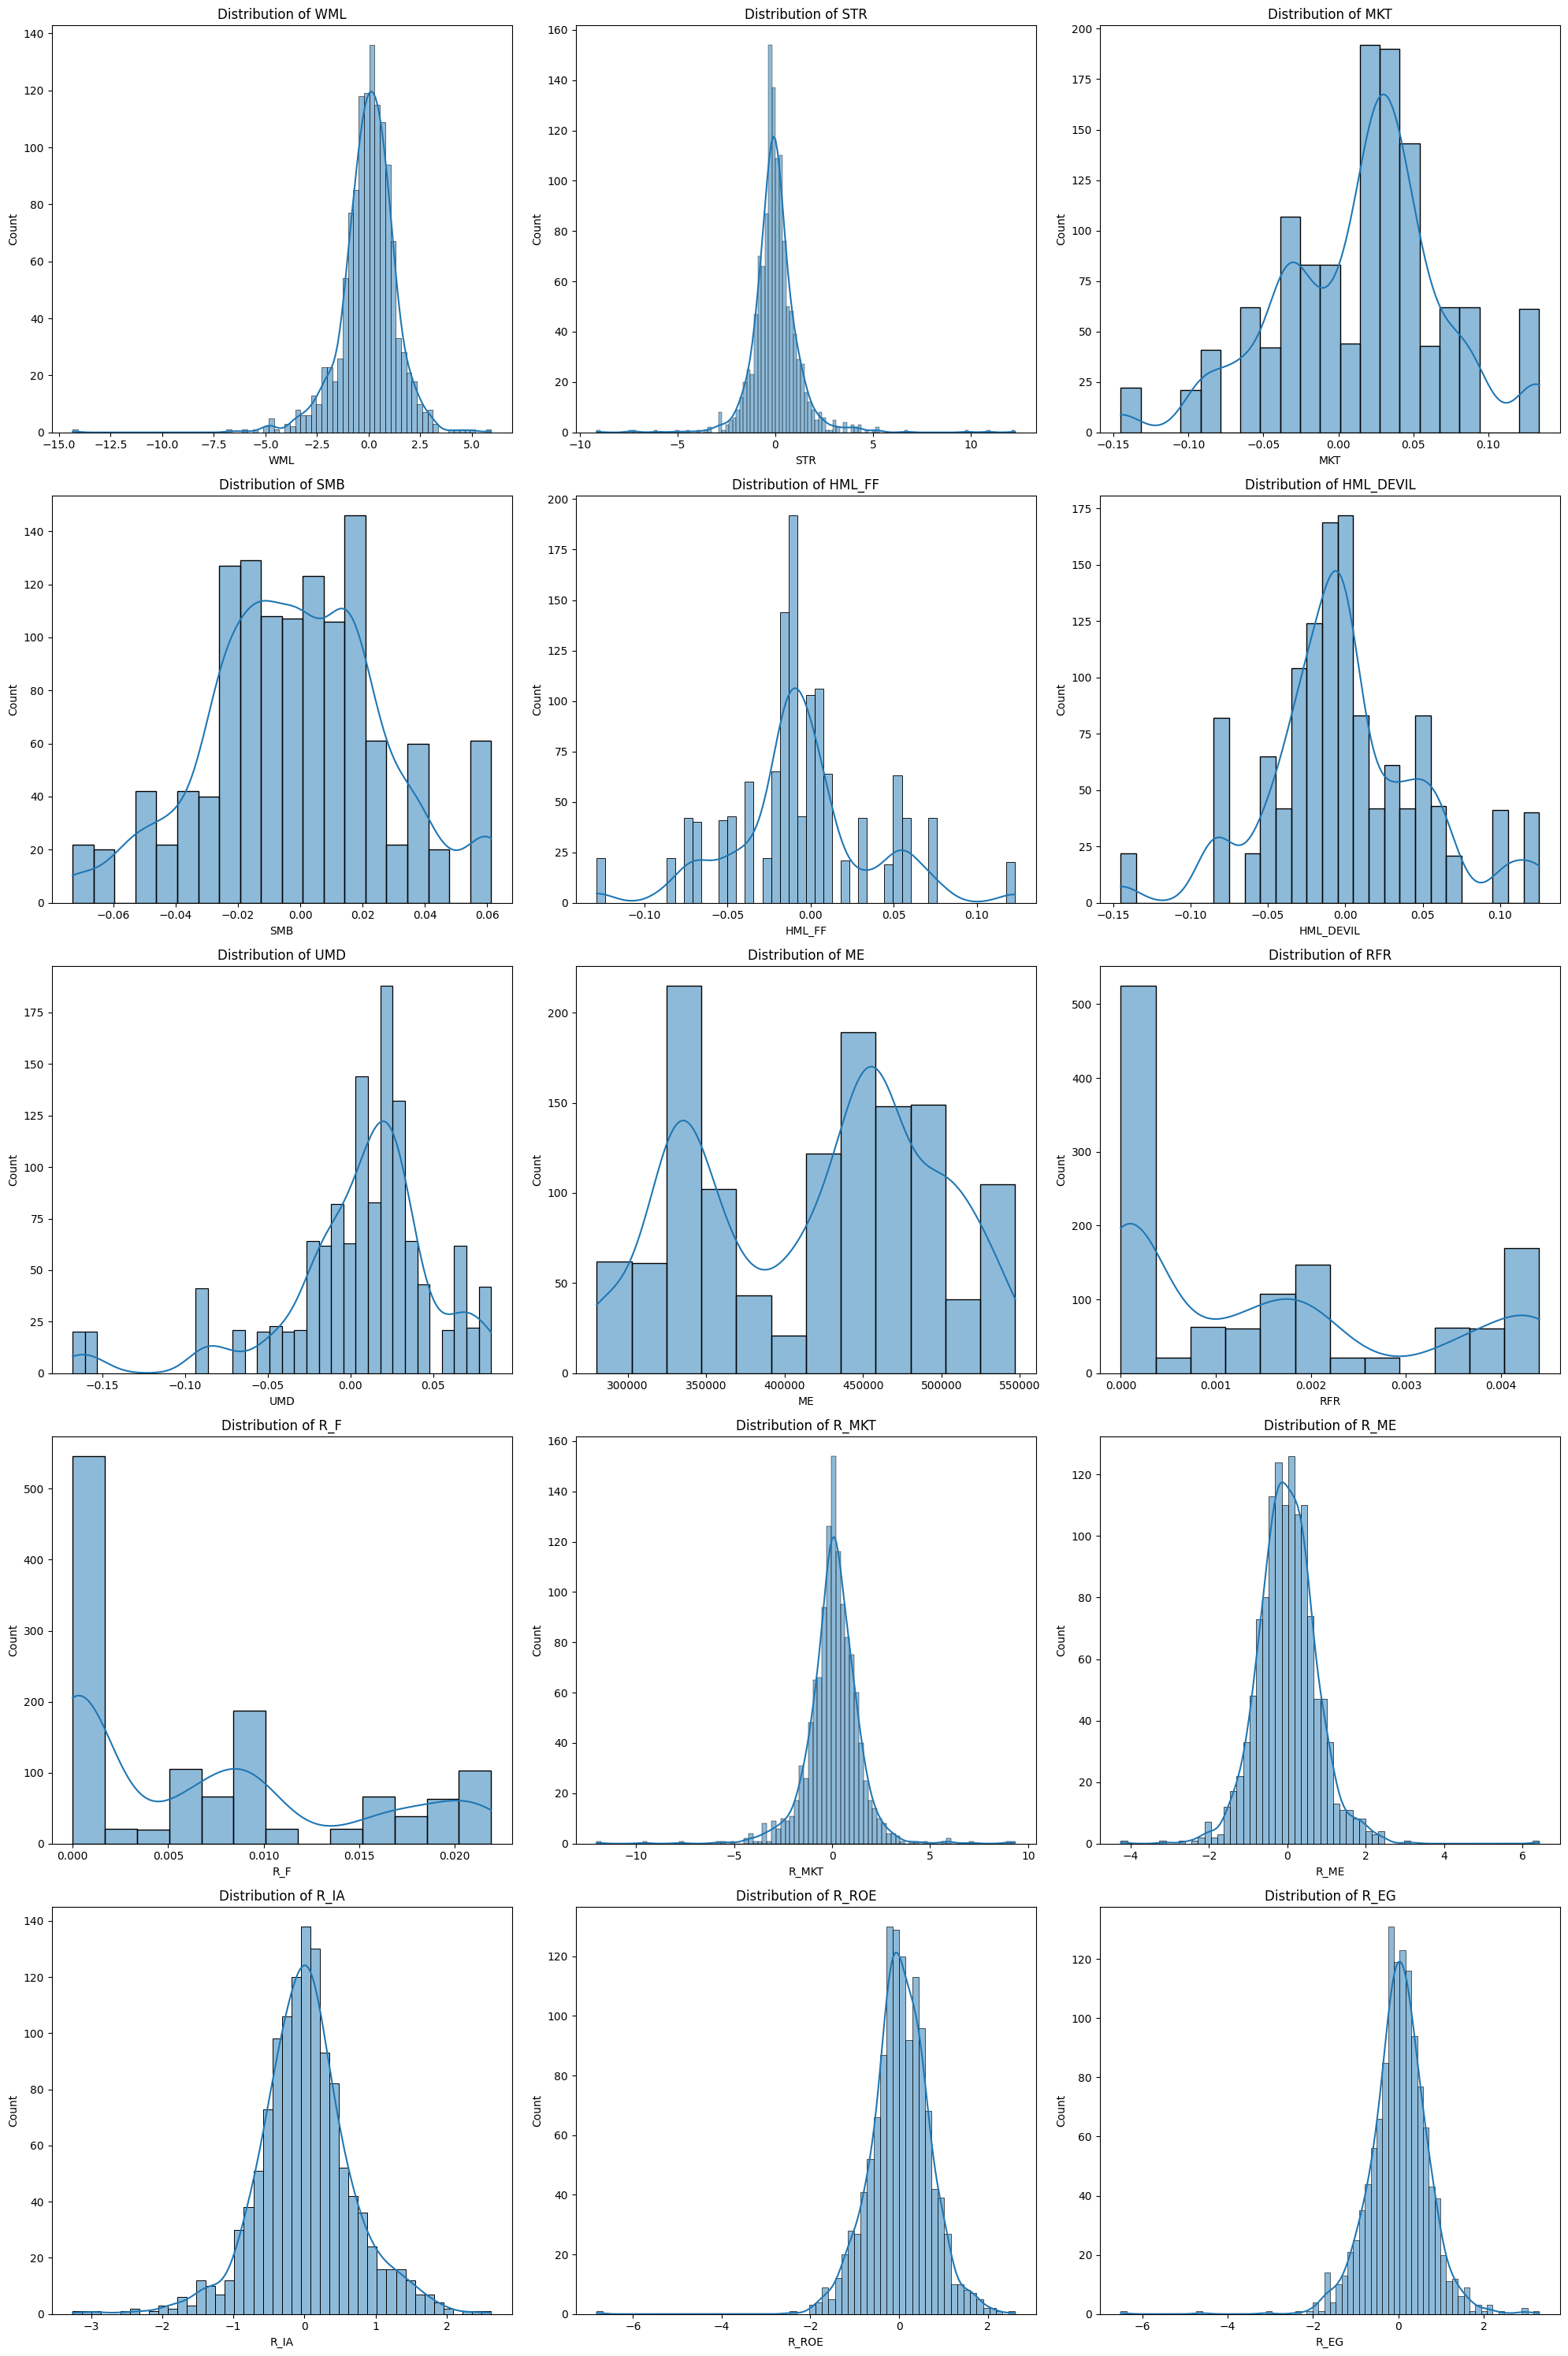

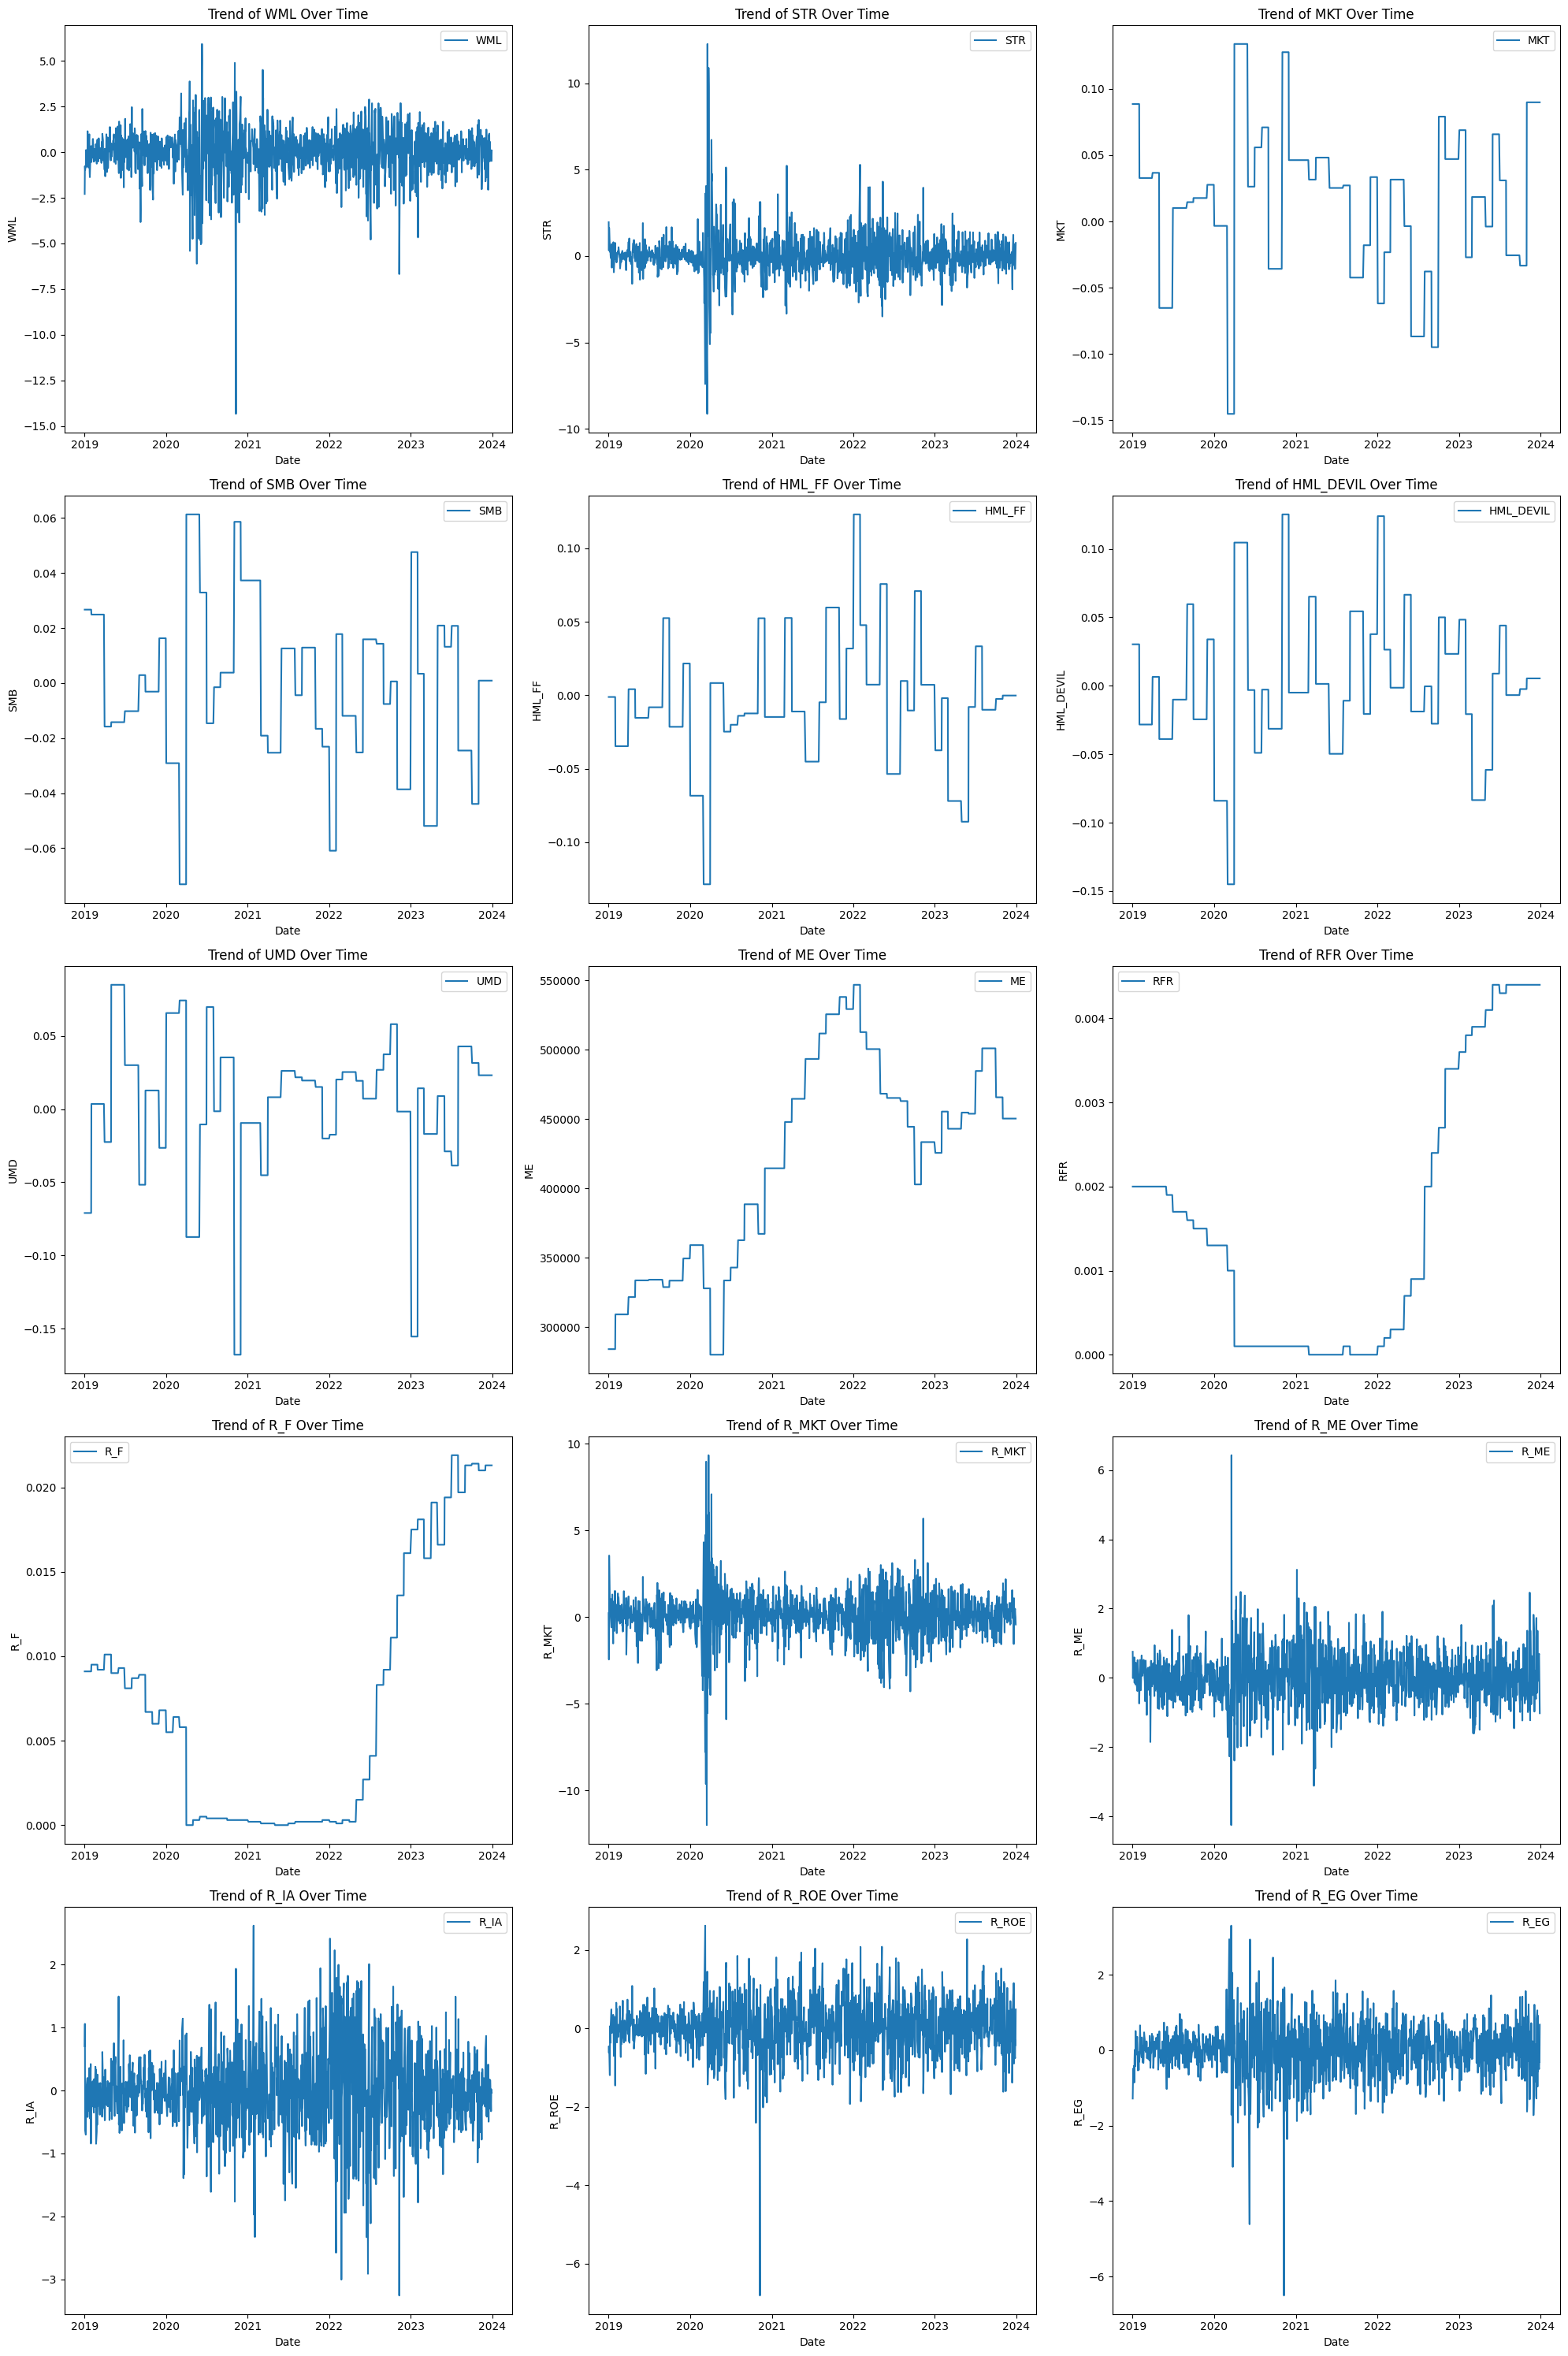

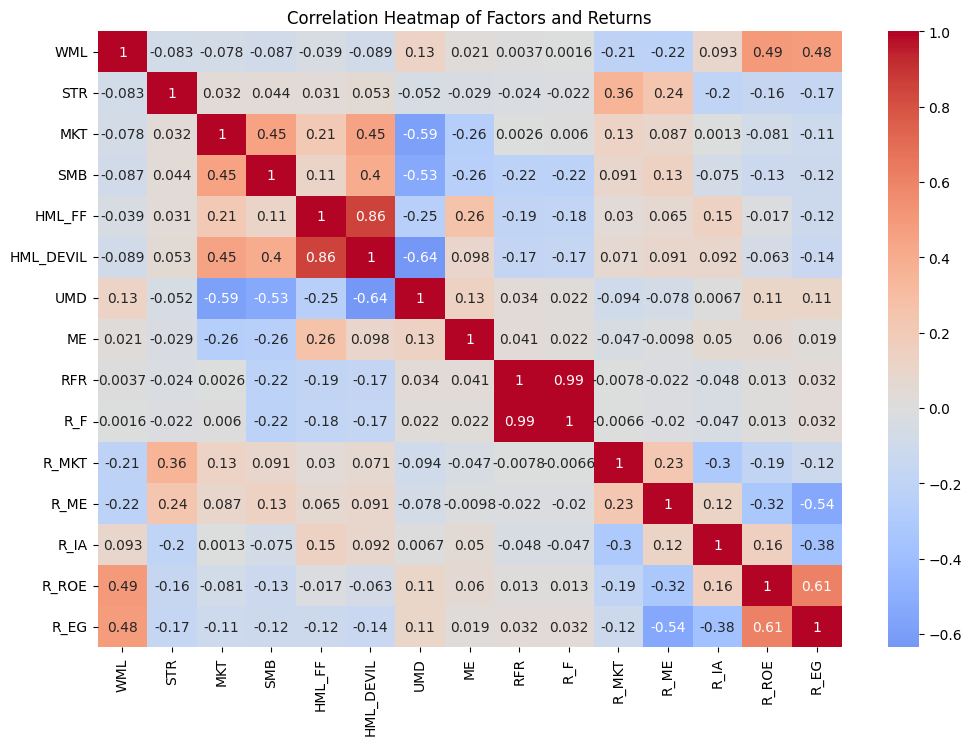

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Load daily data from Google Drive
X_daily_df = pd.read_csv("/content/drive/MyDrive/FRE-6123 Group Project/X_daily.csv")

# Convert date columns to datetime format
X_daily_df['Date'] = pd.to_datetime(X_daily_df['Date'], format='%Y%m%d')  # Adjust the format based on your actual data

# Set 'Date' column as the index
X_daily_df.set_index('Date', inplace=True)

# Convert string columns to numeric after removing commas and percentage signs
for column in X_daily_df.columns:
    if X_daily_df[column].dtype == 'object':  # If the column is of string type
        X_daily_df[column] = X_daily_df[column].str.replace(',', '').str.replace('%', '').astype(float) / 100

def plot_factor_distributions(df):
    """Plot distribution of each factor in a row of 3 plots"""
    columns = df.columns
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 3, figsize=(20, 6 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, column in enumerate(columns):
        sns.histplot(df[column], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')

    # Hide any unused subplots
    for j in range(i + 1, num_rows * 3):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_factor_trends(df):
    """Plot time series trends of each factor in a row of 3 plots"""
    columns = df.columns
    num_columns = len(columns)
    num_rows = (num_columns + 2) // 3  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, 3, figsize=(20, 6 * num_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration

    for i, column in enumerate(columns):
        axes[i].plot(df.index, df[column], label=column)
        axes[i].set_title(f'Trend of {column} Over Time')
        axes[i].set_xlabel('Date')
        axes[i].set_ylabel(column)
        axes[i].legend()

    # Hide any unused subplots
    for j in range(i + 1, num_rows * 3):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

def plot_correlation_heatmap(df):
    """Plot correlation heatmap of factors and returns"""
    corr = df.corr()
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
    plt.title('Correlation Heatmap of Factors and Returns')
    plt.show()

# Plot distribution of each factor
plot_factor_distributions(X_daily_df)

# Plot time series trends of each factor
plot_factor_trends(X_daily_df)

# Plot correlation heatmap
plot_correlation_heatmap(X_daily_df)
